In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('#MamaMbogaMoment - Sheet .csv')
df.head()

,Date,Title,Full Text,Sentiment,Emotion,Region,Account Type,Author,City,Full Name,...,Mentioned Authors,Priority,Professions,Tags,Total Monthly Visitors,Twitter Author ID,Twitter Followers,Twitter Following,Twitter Tweets,Reach (new)
0,2022-07-19 16:47:28.000,RT @HMureithi @Kenyans This is too low for a m...,RT @HMureithi @Kenyans This is too low for a m...,negative,NaN,NaN,individual,mngesa,NaN,mngesa (sir ali),...,"@hmureithi, @kenyans",NaN,NaN,#MamaMbogaMoment,1414667000,1.342399e+08,32,159,462,0
1,2022-07-10 16:21:50.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,Olang_Moses,Nairobi,Olang_Moses (MACHIAVELLIAN),...,"@oleitumbi, @williamsruto",NaN,NaN,#MamaMbogaMoment,1414667000,4.083459e+09,21114,15120,157903,7602
2,2022-07-10 14:36:50.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,CaesarToreto,Nairobi,CaesarToreto (Czar),...,"@oleitumbi, @williamsruto",NaN,Sales/Marketing/PR (Digital Media Strategist),#MamaMbogaMoment,1414667000,1.357592e+18,10073,1209,32910,4958
3,2022-07-09 15:45:27.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,organisational,kirubimuigai,Nairobi,kirubimuigai (Sports IHub),...,"@oleitumbi, @williamsruto",NaN,NaN,#MamaMbogaMoment,1414667000,7.296242e+17,221,34,8326,0
4,2022-07-09 12:34:16.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Rift Valley,individual,125__iconic,Kericho,125__iconic (yusufu),...,"@oleitumbi, @williamsruto",NaN,NaN,#MamaMbogaMoment,1414667000,1.533716e+18,342,183,1705,0


In [3]:
# shape
print(df.shape)

# columns
print(df.columns)

(2396, 25)
Index(['Date', 'Title', 'Full Text', 'Sentiment', 'Emotion', 'Region',
       'Account Type', 'Author', 'City', 'Full Name', 'Gender', 'Hashtags',
       'Impact', 'Impressions', 'Interest', 'Mentioned Authors', 'Priority',
       'Professions', 'Tags', 'Total Monthly Visitors', 'Twitter Author ID',
       'Twitter Followers', 'Twitter Following', 'Twitter Tweets',
       'Reach (new)'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2396 non-null   object 
 1   Title                   2396 non-null   object 
 2   Full Text               2396 non-null   object 
 3   Sentiment               2396 non-null   object 
 4   Emotion                 1084 non-null   object 
 5   Region                  2128 non-null   object 
 6   Account Type            2395 non-null   object 
 7   Author                  2396 non-null   object 
 8   City                    2087 non-null   object 
 9   Full Name               2396 non-null   object 
 10  Gender                  2334 non-null   object 
 11  Hashtags                2395 non-null   object 
 12  Impact                  2396 non-null   float64
 13  Impressions             2396 non-null   int64  
 14  Interest                1211 non-null   

In [5]:
# duplicates
df.duplicated().sum()

0

In [6]:
# lower the columns
df.columns = [column.lower() for column in df.columns]

In [7]:
df.head(2)

,date,title,full text,sentiment,emotion,region,account type,author,city,full name,...,mentioned authors,priority,professions,tags,total monthly visitors,twitter author id,twitter followers,twitter following,twitter tweets,reach (new)
0,2022-07-19 16:47:28.000,RT @HMureithi @Kenyans This is too low for a m...,RT @HMureithi @Kenyans This is too low for a m...,negative,NaN,NaN,individual,mngesa,NaN,mngesa (sir ali),...,"@hmureithi, @kenyans",NaN,NaN,#MamaMbogaMoment,1414667000,1.342399e+08,32,159,462,0
1,2022-07-10 16:21:50.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,Olang_Moses,Nairobi,Olang_Moses (MACHIAVELLIAN),...,"@oleitumbi, @williamsruto",NaN,NaN,#MamaMbogaMoment,1414667000,4.083459e+09,21114,15120,157903,7602


In [8]:
# replace spaces with underscores
df.columns = [column.replace(' ', '_') for column in df.columns]

In [9]:
df.columns

Index(['date', 'title', 'full_text', 'sentiment', 'emotion', 'region',
       'account_type', 'author', 'city', 'full_name', 'gender', 'hashtags',
       'impact', 'impressions', 'interest', 'mentioned_authors', 'priority',
       'professions', 'tags', 'total_monthly_visitors', 'twitter_author_id',
       'twitter_followers', 'twitter_following', 'twitter_tweets',
       'reach_(new)'],
      dtype='object')

In [10]:
# check if the two columns title and full_text have the same content
df['title'].equals(df['full_text'])


False

In [11]:
# most mentioned names in the author section
df['author'].value_counts()

author
Jonngc             32
SelinaTeyie        23
miguelmuguchia     17
azimio022          15
kelvin_mwebia      14
                   ..
obieroh_s           1
LukaleMark          1
mitpiny             1
sonamoz             1
Apologistmirror     1
Name: count, Length: 1379, dtype: int64

In [12]:
# check if author and full name have the same content
df['author'].equals(df['full_name'])

False

In [13]:
df.columns

Index(['date', 'title', 'full_text', 'sentiment', 'emotion', 'region',
       'account_type', 'author', 'city', 'full_name', 'gender', 'hashtags',
       'impact', 'impressions', 'interest', 'mentioned_authors', 'priority',
       'professions', 'tags', 'total_monthly_visitors', 'twitter_author_id',
       'twitter_followers', 'twitter_following', 'twitter_tweets',
       'reach_(new)'],
      dtype='object')

In [14]:
# drop columns full_name, interest, priority, professions, total monthly visits 
df.drop(['full_name', 'interest', 'priority', 'professions'], axis = 1, inplace = True)

In [15]:
df.head(2)

,date,title,full_text,sentiment,emotion,region,account_type,author,city,gender,...,impact,impressions,mentioned_authors,tags,total_monthly_visitors,twitter_author_id,twitter_followers,twitter_following,twitter_tweets,reach_(new)
0,2022-07-19 16:47:28.000,RT @HMureithi @Kenyans This is too low for a m...,RT @HMureithi @Kenyans This is too low for a m...,negative,NaN,NaN,individual,mngesa,NaN,male,...,0.0,32,"@hmureithi, @kenyans",#MamaMbogaMoment,1414667000,1.342399e+08,32,159,462,0
1,2022-07-10 16:21:50.000,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,Olang_Moses,Nairobi,unknown,...,38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,1414667000,4.083459e+09,21114,15120,157903,7602


In [16]:
# drop the date column
df.drop('date', axis = 1, inplace = True)

In [17]:
# set index to twitter ID
df.set_index('twitter_author_id', inplace = True)

In [18]:
df.head(3)

,title,full_text,sentiment,emotion,region,account_type,author,city,gender,hashtags,impact,impressions,mentioned_authors,tags,total_monthly_visitors,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,,,,
1.342399e+08,RT @HMureithi @Kenyans This is too low for a m...,RT @HMureithi @Kenyans This is too low for a m...,negative,NaN,NaN,individual,mngesa,NaN,male,#mamambogamoment,0.0,32,"@hmureithi, @kenyans",#MamaMbogaMoment,1414667000,32,159,462,0
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,Olang_Moses,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,1414667000,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,CaesarToreto,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,"@oleitumbi, @williamsruto",#MamaMbogaMoment,1414667000,10073,1209,32910,4958


In [19]:
df.drop(['total_monthly_visitors'], axis = 1, inplace = True)

In [20]:
df.head(3)

,title,full_text,sentiment,emotion,region,account_type,author,city,gender,hashtags,impact,impressions,mentioned_authors,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,,,
1.342399e+08,RT @HMureithi @Kenyans This is too low for a m...,RT @HMureithi @Kenyans This is too low for a m...,negative,NaN,NaN,individual,mngesa,NaN,male,#mamambogamoment,0.0,32,"@hmureithi, @kenyans",#MamaMbogaMoment,32,159,462,0
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,Olang_Moses,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,NaN,Nairobi,individual,CaesarToreto,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,"@oleitumbi, @williamsruto",#MamaMbogaMoment,10073,1209,32910,4958


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 134239948.0 to 2931907132.0
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2396 non-null   object 
 1   full_text          2396 non-null   object 
 2   sentiment          2396 non-null   object 
 3   emotion            1084 non-null   object 
 4   region             2128 non-null   object 
 5   account_type       2395 non-null   object 
 6   author             2396 non-null   object 
 7   city               2087 non-null   object 
 8   gender             2334 non-null   object 
 9   hashtags           2395 non-null   object 
 10  impact             2396 non-null   float64
 11  impressions        2396 non-null   int64  
 12  mentioned_authors  1433 non-null   object 
 13  tags               2396 non-null   object 
 14  twitter_followers  2396 non-null   int64  
 15  twitter_following  2396 non-null   int64  
 16  twitter_twe

In [22]:
# instead of emotion use sentiment
df.drop(['emotion'], axis = 1, inplace=True)

In [23]:
# drop the missing values in the column city and region
df.dropna(subset = ['region'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 4083458907.0 to 68382599.0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2128 non-null   object 
 1   full_text          2128 non-null   object 
 2   sentiment          2128 non-null   object 
 3   region             2128 non-null   object 
 4   account_type       2128 non-null   object 
 5   author             2128 non-null   object 
 6   city               2087 non-null   object 
 7   gender             2071 non-null   object 
 8   hashtags           2128 non-null   object 
 9   impact             2128 non-null   float64
 10  impressions        2128 non-null   int64  
 11  mentioned_authors  1264 non-null   object 
 12  tags               2128 non-null   object 
 13  twitter_followers  2128 non-null   int64  
 14  twitter_following  2128 non-null   int64  
 15  twitter_tweets     2128 non-null   int64  
 16  reach_(new) 

In [25]:
df['city'].isnull().sum()

41

In [26]:
df['city'] = df['city'].fillna('Unknown')

In [27]:
df['city'].value_counts()

city
Nairobi     1668
Nakuru        95
Mombasa       92
Eldoret       79
Unknown       41
Kisumu        28
Thika         21
Kakamega      17
Meru          16
Kisii         16
Naivasha      10
Nyeri          8
Kericho        8
Kilifi         8
Machakos       7
Nanyuki        7
Kitale         4
Malindi        2
Embu           1
Name: count, dtype: int64

In [28]:
df.shape

(2128, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 4083458907.0 to 68382599.0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2128 non-null   object 
 1   full_text          2128 non-null   object 
 2   sentiment          2128 non-null   object 
 3   region             2128 non-null   object 
 4   account_type       2128 non-null   object 
 5   author             2128 non-null   object 
 6   city               2128 non-null   object 
 7   gender             2071 non-null   object 
 8   hashtags           2128 non-null   object 
 9   impact             2128 non-null   float64
 10  impressions        2128 non-null   int64  
 11  mentioned_authors  1264 non-null   object 
 12  tags               2128 non-null   object 
 13  twitter_followers  2128 non-null   int64  
 14  twitter_following  2128 non-null   int64  
 15  twitter_tweets     2128 non-null   int64  
 16  reach_(new) 

In [30]:
df.head(2)

,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,mentioned_authors,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,,
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,unknown,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,"@oleitumbi, @williamsruto",#MamaMbogaMoment,10073,1209,32910,4958


In [31]:
df['gender'] = df['gender'].replace('unknown', 'prefer not to say')
df['gender']  = df['gender'].fillna('prefer not to say')

In [32]:
df.head(5)

,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,mentioned_authors,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,,
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,"@oleitumbi, @williamsruto",#MamaMbogaMoment,10073,1209,32910,4958
7.296242e+17,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,organisational,kirubimuigai,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",0.0,221,"@oleitumbi, @williamsruto",#MamaMbogaMoment,221,34,8326,0
1.533716e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Rift Valley,individual,125__iconic,Kericho,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",0.0,342,"@oleitumbi, @williamsruto",#MamaMbogaMoment,342,183,1705,0
1.524934e+18,RT @OleItumbi I am taking a 36 Hours break fro...,RT @OleItumbi I am taking a 36 Hours break fro...,neutral,Rift Valley,individual,Bonniedes,Nanyuki,prefer not to say,"#mamambogamoment, #hustlernation, #radico",2.3,2024,@,#MamaMbogaMoment,2024,1795,37657,1205


In [33]:
df.to_csv('cleaned_data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 4083458907.0 to 68382599.0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2128 non-null   object 
 1   full_text          2128 non-null   object 
 2   sentiment          2128 non-null   object 
 3   region             2128 non-null   object 
 4   account_type       2128 non-null   object 
 5   author             2128 non-null   object 
 6   city               2128 non-null   object 
 7   gender             2128 non-null   object 
 8   hashtags           2128 non-null   object 
 9   impact             2128 non-null   float64
 10  impressions        2128 non-null   int64  
 11  mentioned_authors  1264 non-null   object 
 12  tags               2128 non-null   object 
 13  twitter_followers  2128 non-null   int64  
 14  twitter_following  2128 non-null   int64  
 15  twitter_tweets     2128 non-null   int64  
 16  reach_(new) 

In [35]:
df.drop(['mentioned_authors'], axis = 1, inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 4083458907.0 to 68382599.0
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2128 non-null   object 
 1   full_text          2128 non-null   object 
 2   sentiment          2128 non-null   object 
 3   region             2128 non-null   object 
 4   account_type       2128 non-null   object 
 5   author             2128 non-null   object 
 6   city               2128 non-null   object 
 7   gender             2128 non-null   object 
 8   hashtags           2128 non-null   object 
 9   impact             2128 non-null   float64
 10  impressions        2128 non-null   int64  
 11  tags               2128 non-null   object 
 12  twitter_followers  2128 non-null   int64  
 13  twitter_following  2128 non-null   int64  
 14  twitter_tweets     2128 non-null   int64  
 15  reach_(new)        2128 non-null   int64  
dtypes: float64(1

In [37]:
df.to_csv('clean_data.csv')

In [38]:
df.head()

,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,#MamaMbogaMoment,10073,1209,32910,4958
7.296242e+17,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,organisational,kirubimuigai,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",0.0,221,#MamaMbogaMoment,221,34,8326,0
1.533716e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Rift Valley,individual,125__iconic,Kericho,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",0.0,342,#MamaMbogaMoment,342,183,1705,0
1.524934e+18,RT @OleItumbi I am taking a 36 Hours break fro...,RT @OleItumbi I am taking a 36 Hours break fro...,neutral,Rift Valley,individual,Bonniedes,Nanyuki,prefer not to say,"#mamambogamoment, #hustlernation, #radico",2.3,2024,#MamaMbogaMoment,2024,1795,37657,1205


In [39]:
data_copy = df.copy()

In [40]:
data_copy.head(2)

,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,#MamaMbogaMoment,10073,1209,32910,4958


In [41]:
# authors that contain the largest number of entries
# the data had most entries from the following people 
data_copy['author'].value_counts().nlargest(20)

author
Jonngc            32
SelinaTeyie       23
miguelmuguchia    17
azimio022         15
GunnerAfrican     14
kelvin_mwebia     14
KipKalyaNoah      13
tembeakenyaa      13
kimarumainah      12
DaView_k          10
David___Mbugua    10
OleItumbi         10
Luciann254         9
Mwaistanley2       9
Ericmwa            9
la_greatke         9
MwaurahDrax        8
NoelRotich         8
sammy_macharia     8
MastonKim1         8
Name: count, dtype: int64

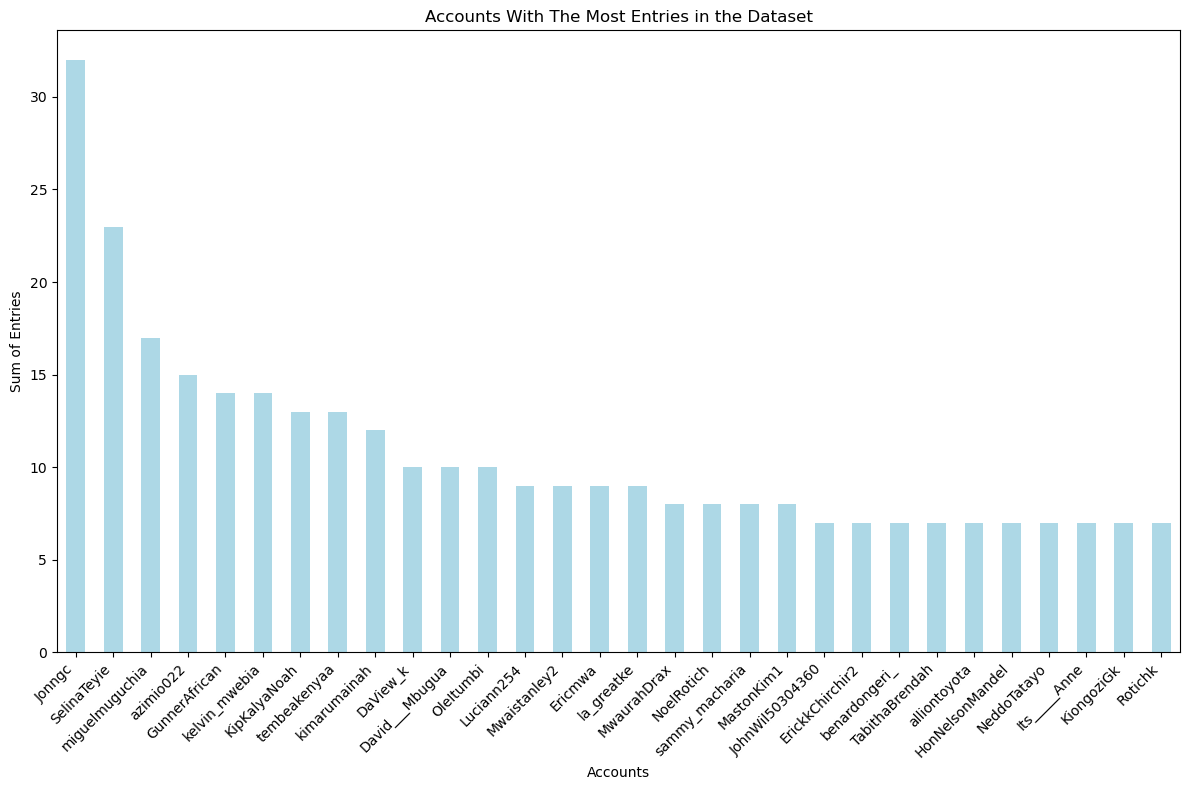

In [42]:
# data was mostly captured from these accounts
# authors with the highest entries(25)
top_25_authors = data_copy['author'].value_counts().nlargest(30)

# Create a bar graph
plt.figure(figsize=(12, 8))
top_25_authors.plot(kind='bar', color = 'lightblue')

# Add labels and title
plt.xlabel('Accounts')
plt.ylabel('Sum of Entries')
plt.title('Accounts With The Most Entries in the Dataset')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


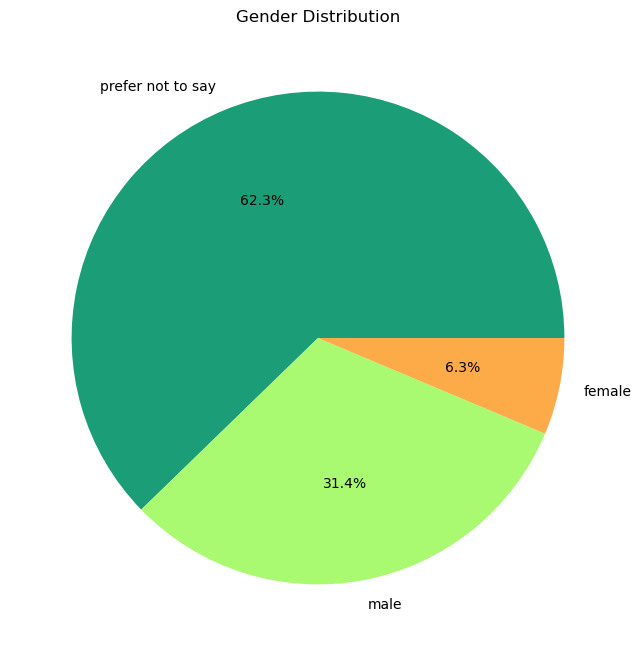

In [43]:
# gender distribution of the dataset 
# Calculate gender distribution
gender_distribution = data_copy['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['#1b9e77', '#a9f971', '#fdaa48']) #'#66b3ff', '#99ff99', '#ffcc99'

# Add a title
plt.title('Gender Distribution')

# Save the plot as an image file
plt.savefig('gender_distribution.png') 

# Show the plot
plt.show()


In [44]:
df['city'].value_counts()

city
Nairobi     1668
Nakuru        95
Mombasa       92
Eldoret       79
Unknown       41
Kisumu        28
Thika         21
Kakamega      17
Meru          16
Kisii         16
Naivasha      10
Nyeri          8
Kericho        8
Kilifi         8
Machakos       7
Nanyuki        7
Kitale         4
Malindi        2
Embu           1
Name: count, dtype: int64

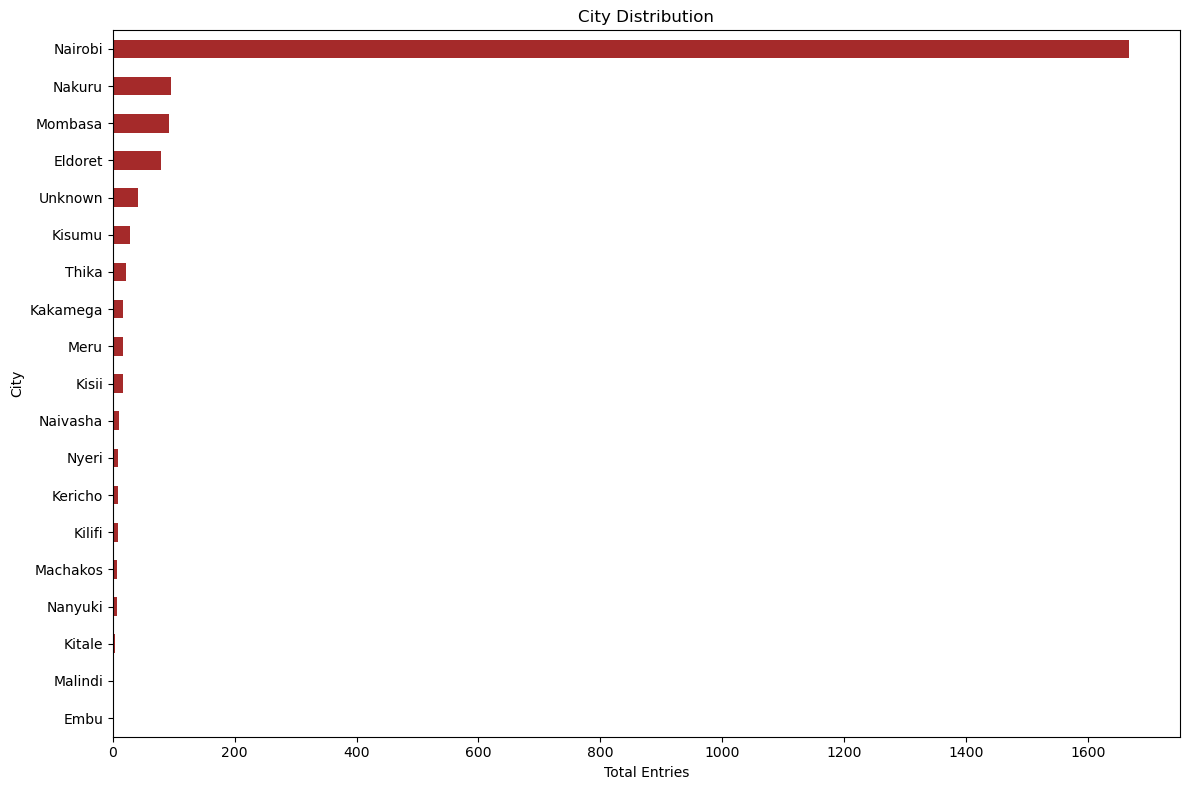

In [45]:

# Get the value counts for the 'city' column
city_counts = df['city'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
city_counts.plot(kind='barh', color='brown')

# Add labels and title
plt.xlabel('Total Entries')
plt.ylabel('City')
plt.title('City Distribution')

# Show the plot
plt.tight_layout()
plt.show()


In [46]:
df.head(3)

,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
twitter_author_id,,,,,,,,,,,,,,,,
4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,#MamaMbogaMoment,21114,15120,157903,7602
1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,#MamaMbogaMoment,10073,1209,32910,4958
7.296242e+17,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,organisational,kirubimuigai,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",0.0,221,#MamaMbogaMoment,221,34,8326,0


In [47]:
df.reset_index(inplace = True)

In [48]:
df['full_text']

0       RT @kilundeezy A good reminder @OleItumbi pay ...
1       RT @kilundeezy A good reminder @OleItumbi pay ...
2       RT @kilundeezy A good reminder @OleItumbi pay ...
3       RT @kilundeezy A good reminder @OleItumbi pay ...
4       RT @OleItumbi I am taking a 36 Hours break fro...
                              ...                        
2123    RT @OleItumbi The August 9, poll is a contest ...
2124    RT @OleItumbi The August 9, poll is a contest ...
2125    RT @OleItumbi The August 9, poll is a contest ...
2126    RT @OleItumbi The August 9, poll is a contest ...
2127    The August 9, poll is a contest between DP @Wi...
Name: full_text, Length: 2128, dtype: object

In [49]:
df['full_text']

0       RT @kilundeezy A good reminder @OleItumbi pay ...
1       RT @kilundeezy A good reminder @OleItumbi pay ...
2       RT @kilundeezy A good reminder @OleItumbi pay ...
3       RT @kilundeezy A good reminder @OleItumbi pay ...
4       RT @OleItumbi I am taking a 36 Hours break fro...
                              ...                        
2123    RT @OleItumbi The August 9, poll is a contest ...
2124    RT @OleItumbi The August 9, poll is a contest ...
2125    RT @OleItumbi The August 9, poll is a contest ...
2126    RT @OleItumbi The August 9, poll is a contest ...
2127    The August 9, poll is a contest between DP @Wi...
Name: full_text, Length: 2128, dtype: object

In [50]:
# @WilliamsRuto SMALL businesses is a MAJOR source of employment in Kenya. 
# Dr William Ruto's administration will VALUE, PROTECT and, SUPPORT all SMEs✊ 
# #KenyaKwanza #economy #Mitumba #mamambogamoment #bodaboda #graduates #teachers #medics #Farmers #TheFutureOfKenya"

In [51]:
# let's go ahead and analyze the tweets 
tweets_df = df[['full_text']].copy()
tweets_df

,full_text
0,RT @kilundeezy A good reminder @OleItumbi pay ...
1,RT @kilundeezy A good reminder @OleItumbi pay ...
2,RT @kilundeezy A good reminder @OleItumbi pay ...
3,RT @kilundeezy A good reminder @OleItumbi pay ...
4,RT @OleItumbi I am taking a 36 Hours break fro...
...,...
2123,"RT @OleItumbi The August 9, poll is a contest ..."
2124,"RT @OleItumbi The August 9, poll is a contest ..."
2125,"RT @OleItumbi The August 9, poll is a contest ..."
2126,"RT @OleItumbi The August 9, poll is a contest ..."


In [52]:
tweets_df.head()

,full_text
0,RT @kilundeezy A good reminder @OleItumbi pay ...
1,RT @kilundeezy A good reminder @OleItumbi pay ...
2,RT @kilundeezy A good reminder @OleItumbi pay ...
3,RT @kilundeezy A good reminder @OleItumbi pay ...
4,RT @OleItumbi I am taking a 36 Hours break fro...


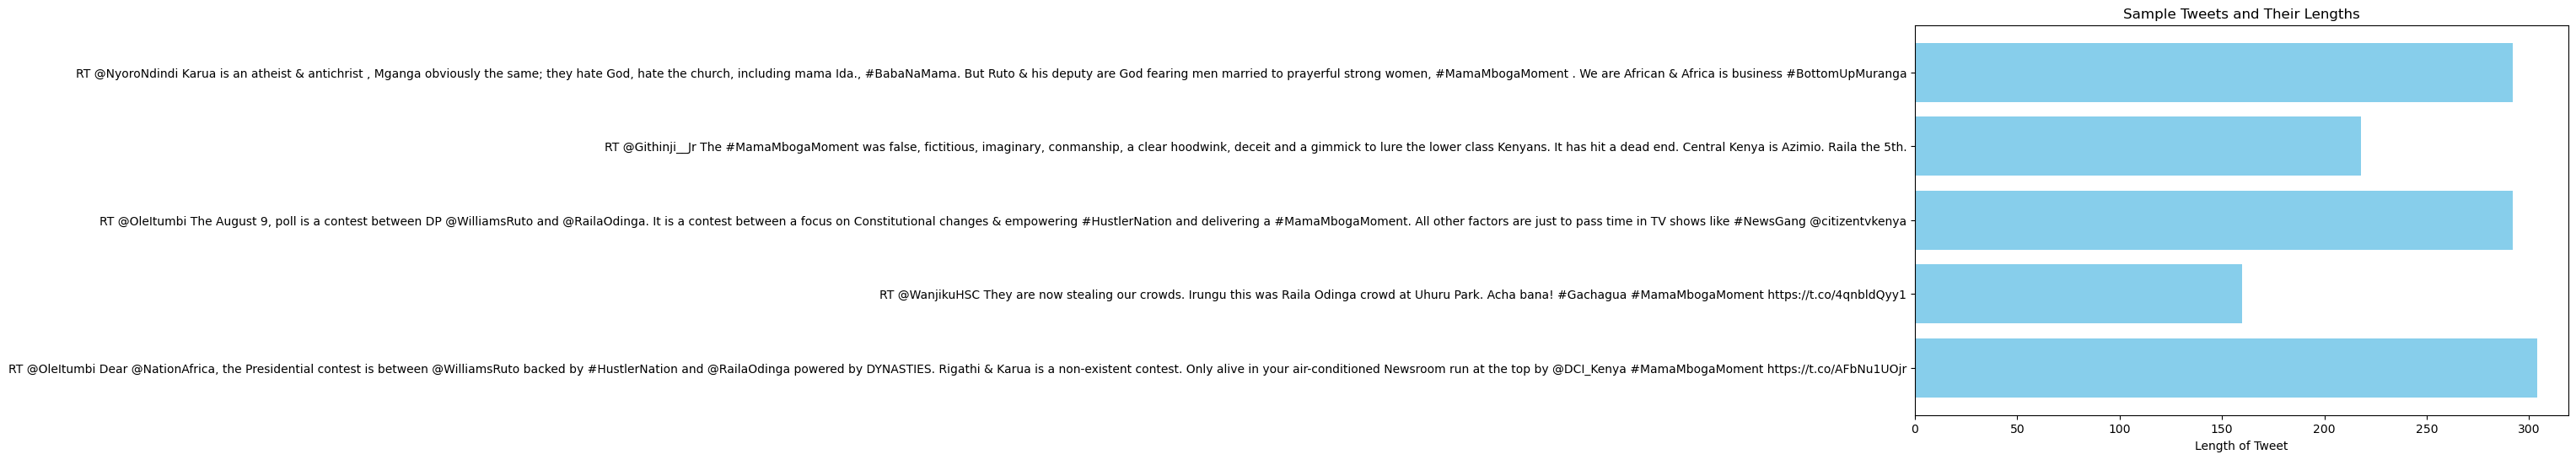

In [53]:
import matplotlib.pyplot as plt

# Select a few random tweets
sample_tweets = df['full_text'].sample(n=5, random_state=1).tolist()

# Plot the sample tweets
plt.figure(figsize=(10, 6))
plt.barh(range(len(sample_tweets)), [len(tweet) for tweet in sample_tweets], color='skyblue')
plt.yticks(range(len(sample_tweets)), sample_tweets)
plt.xlabel('Length of Tweet')
plt.title('Sample Tweets and Their Lengths')
plt.show()


In [68]:
df['full_text'].iloc[2001]

'RT @OleItumbi The August 9, poll is a contest between DP @WilliamsRuto and @RailaOdinga. It is a contest between a focus on Constitutional changes & empowering #HustlerNation and delivering a #MamaMbogaMoment. All other factors are just to pass time in TV shows like #NewsGang @citizentvkenya'

In [54]:
# lets first look at the tweet structure
# key components of publishing and posting the tweets
# looked at 10 tweets
# from this analysis found out there two key political figures : William Ruto & Raila Odinga
# the tweets tagged these political figures
# hashtags accompanied the tweets i.e #MamaMbogaMoment, #HustlerNation, #BabaNaMama
# Religion playing a key role in the general elections, it came up 
# identified one trend jacker 
# Oleitumbi was paying infuencers

In [55]:
# Define regex pattern to extract retweet usernames
pattern = r"RT\s+@(\w+)"

# Extract retweet usernames
extracted_usernames = tweets_df['full_text'].str.extractall(pattern)

# Reset index and handle potential duplicates
extracted_usernames = extracted_usernames.reset_index(level=0, drop=True)

# Count occurrences of each username
username_counts = extracted_usernames[0].value_counts()

# Create a DataFrame from the counts for better readability
most_retweeted_df = pd.DataFrame({'username': username_counts.index, 'count': username_counts.values})

# Sort by count to find the most retweeted users
most_retweeted_df = most_retweeted_df.sort_values(by='count', ascending=False)

# Display the DataFrame
most_retweeted_df

,username,count
0,OleItumbi,930
1,WanjikuHSC,118
2,NyoroNdindi,98
3,uda_hustler,55
4,liam_tweep,48
...,...,...
83,GunnerAfrican,1
84,Dennoh_kelly,1
86,mzinga_iko,1
87,PaulineNjau5,1


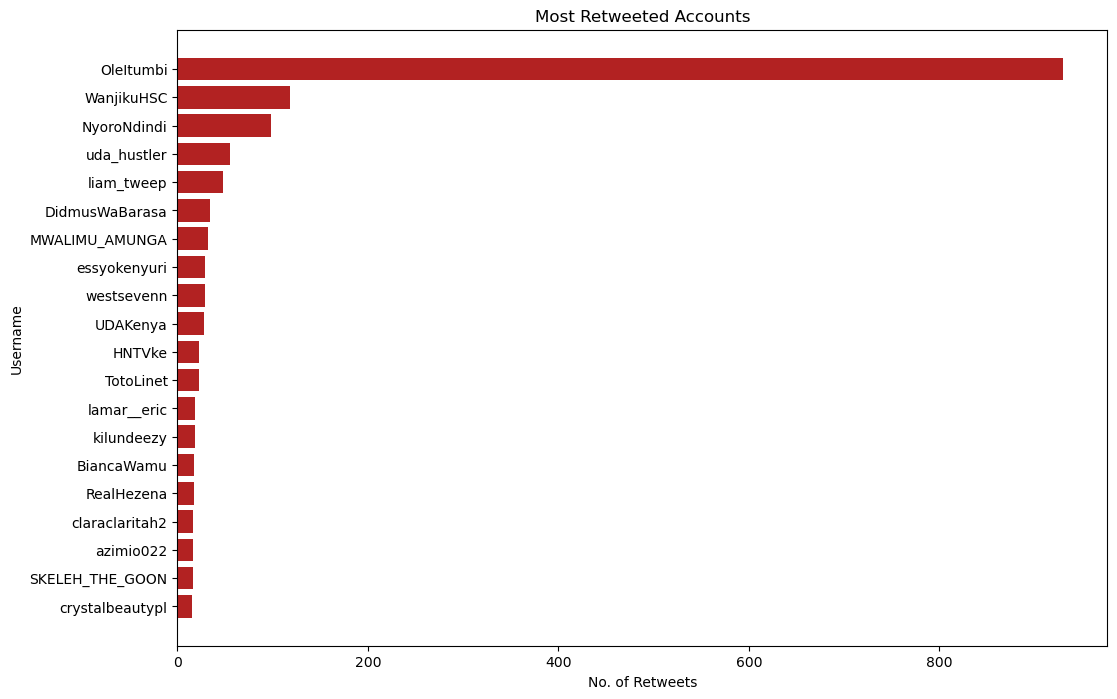

In [56]:
# most retweeted accounts often show
# most people agreeing with you
# let's visualize this
# Get the top 20 most retweeted users
top_20_most_retweeted_df = most_retweeted_df.head(20)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_most_retweeted_df['username'], top_20_most_retweeted_df['count'], color='firebrick')
plt.xlabel('No. of Retweets')
plt.ylabel('Username')
plt.title('Most Retweeted Accounts')
plt.gca().invert_yaxis()  # To show the highest counts at the top
plt.show()

In [57]:
# most influential accounts based on people retweeting them 
# people engaging with their content
# to also mean there are high chances of their content showing up on my feed 

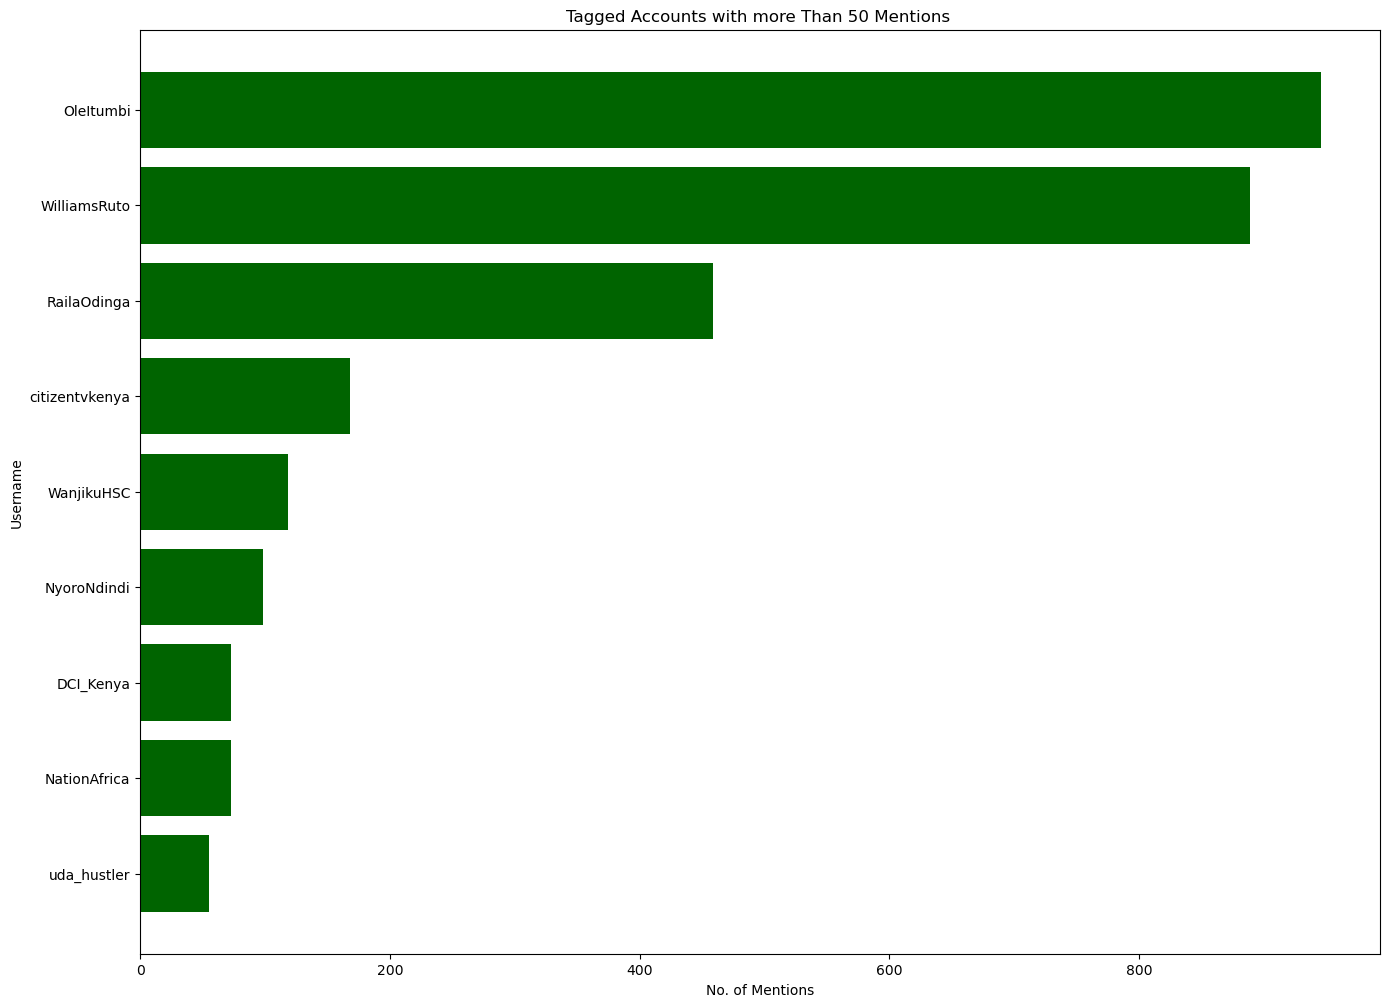

In [71]:
# Define regex pattern to extract tagged usernames
pattern = r"@(\w+)"

# Extract tagged usernames
extracted_usernames = tweets_df['full_text'].str.findall(pattern)

# Flatten the list of lists
flattened_usernames = [username for sublist in extracted_usernames for username in sublist]

# Count occurrences of each username
username_counts = pd.Series(flattened_usernames).value_counts()

# Create a DataFrame from the counts for better readability
tagged_accounts_df = pd.DataFrame({'username': username_counts.index, 'count': username_counts.values})

# Filter out accounts tagged 50 or fewer times
filtered_tagged_accounts_df = tagged_accounts_df[tagged_accounts_df['count'] > 50]

# Display the filtered DataFrame
# print(filtered_tagged_accounts_df)

# Plot a horizontal bar chart of tagged accounts with more than 50 mentions
plt.figure(figsize=(16, 12))  # Increased figure size
plt.barh(filtered_tagged_accounts_df['username'], filtered_tagged_accounts_df['count'], color='darkgreen')
plt.xlabel('No. of Mentions')
plt.ylabel('Username')
plt.title('Tagged Accounts with more Than 50 Mentions ')
plt.gca().invert_yaxis()  # To show the highest counts at the top
plt.show()

         username  count
3  citizentvkenya    168
7    NationAfrica     73


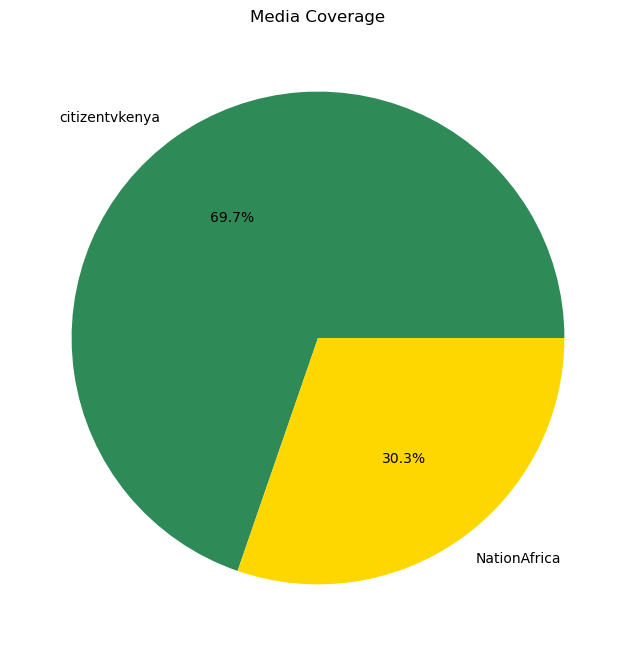

In [ ]:
# Filter for specific press media accounts
press_media_accounts = ['citizentvkenya', 'NationAfrica']
filtered_press_media_df = filtered_tagged_accounts_df[filtered_tagged_accounts_df['username'].isin(press_media_accounts)]

# Display the filtered DataFrame
print(filtered_press_media_df)

# Plot a pie chart for the press media accounts
plt.figure(figsize=(8, 8))
plt.pie(filtered_press_media_df['count'], labels=filtered_press_media_df['username'], autopct='%1.1f%%', colors=['seagreen','gold'])
plt.title('Media Coverage')
plt.show()

C:\Users\Atieno\AppData\Local\Temp\ipykernel_9816\1181466158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_press_media_df['label'] = filtered_press_media_df['username'].map(label_mapping)


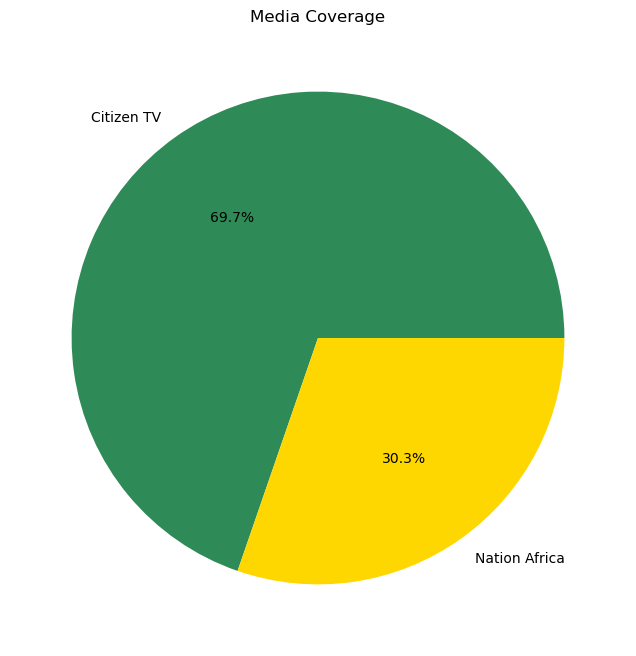

In [ ]:
import matplotlib.pyplot as plt

# Assuming filtered_tagged_accounts_df is your DataFrame with the necessary data

# Filter for specific press media accounts
press_media_accounts = ['citizentvkenya', 'NationAfrica']
filtered_press_media_df = filtered_tagged_accounts_df[filtered_tagged_accounts_df['username'].isin(press_media_accounts)]

# Rename the labels
label_mapping = {'citizentvkenya': 'Citizen TV', 'NationAfrica': 'Nation Africa'}
filtered_press_media_df['label'] = filtered_press_media_df['username'].map(label_mapping)

# Plot a pie chart for the press media accounts
plt.figure(figsize=(8, 8))
plt.pie(filtered_press_media_df['count'], labels=filtered_press_media_df['label'], autopct='%1.1f%%', colors=['seagreen', 'gold'])
plt.title('Media Coverage')
plt.show()


In [ ]:
df.head(2)

,twitter_author_id,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
0,4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,#MamaMbogaMoment,21114,15120,157903,7602
1,1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,#MamaMbogaMoment,10073,1209,32910,4958


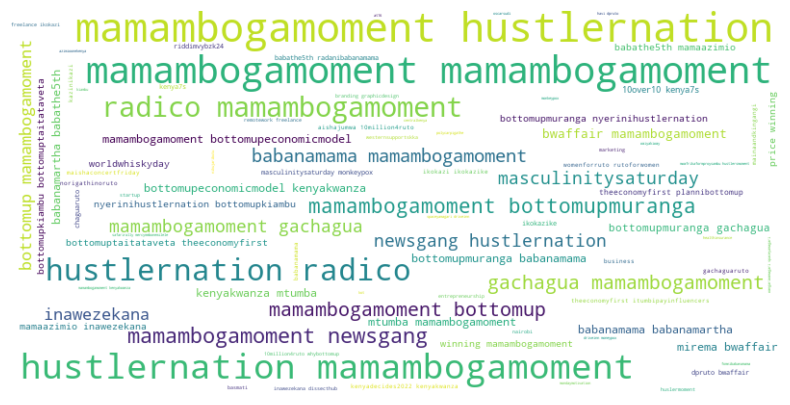

In [ ]:
from wordcloud import WordCloud

# Combine all hashtags into a single string
all_hashtags = ' '.join(df['hashtags'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

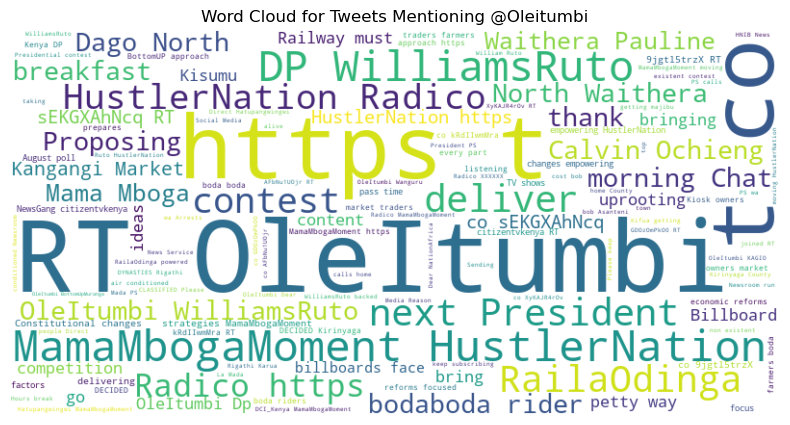

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the regex pattern to find mentions of @Oleitumbi
pattern = r'@Oleitumbi'

# Sample DataFrame setup (replace this with your actual DataFrame)
# df = pd.DataFrame({'full_text': [...]})

# Filter tweets that mention @Oleitumbi
mentioned_tweets = df[df['full_text'].str.contains(pattern, case=False, na=False)]

# Check if there are any tweets mentioning @Oleitumbi
if not mentioned_tweets.empty:
    # Combine all tweets mentioning @Oleitumbi into a single string
    all_mentions = ' '.join(mentioned_tweets['full_text'].dropna().tolist())

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_mentions)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axis
    plt.title('Word Cloud for Tweets Mentioning @Oleitumbi')
    plt.show()
else:
    print("No tweets mentioning @Oleitumbi were found.")


In [ ]:
df['full_text'].iloc[1]

'RT @kilundeezy A good reminder @OleItumbi pay Influencers.@WilliamsRuto 20/05/2022 #MamaMbogamoment 21/05/2022 #BottomUpMuranga 21/05/2022 #NyeriNiHustlerNation 23/05/2023 #BottomUpKiambu 24/05/2022 #BottomUpTaitaTaveta 25/05/2022 #TheEconomyFirst 26/05/2022 #PlanNiBottomUp'

In [1]:
import pandas as pd

In [2]:
trend_jackers = pd.read_csv('cleaned_data.csv')

In [3]:
trend_jackers.head(2)

,twitter_author_id,title,full_text,sentiment,region,account_type,author,city,gender,hashtags,impact,impressions,mentioned_authors,tags,twitter_followers,twitter_following,twitter_tweets,reach_(new)
0,4.083459e+09,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,Olang_Moses,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",38.9,21114,"@oleitumbi, @williamsruto",#MamaMbogaMoment,21114,15120,157903,7602
1,1.357592e+18,RT @kilundeezy A good reminder @OleItumbi pa...,RT @kilundeezy A good reminder @OleItumbi pay ...,neutral,Nairobi,individual,CaesarToreto,Nairobi,prefer not to say,"#mamambogamoment, #bottomupmuranga, #nyerinihu...",31.8,10073,"@oleitumbi, @williamsruto",#MamaMbogaMoment,10073,1209,32910,4958


In [4]:
trend_jackers.columns

Index(['twitter_author_id', 'title', 'full_text', 'sentiment', 'region',
       'account_type', 'author', 'city', 'gender', 'hashtags', 'impact',
       'impressions', 'mentioned_authors', 'tags', 'twitter_followers',
       'twitter_following', 'twitter_tweets', 'reach_(new)'],
      dtype='object')

In [ ]:
df_new = trend_jackers[trend_jackers['author', 'full_text' 'impact' < 5.0]]

In [5]:
df_new = trend_jackers[trend_jackers['impact'] < 5.0][['author', 'full_text', 'impact']]

In [6]:
df_new.head()

,author,full_text,impact
2,kirubimuigai,RT @kilundeezy A good reminder @OleItumbi pay ...,0.0
3,125__iconic,RT @kilundeezy A good reminder @OleItumbi pay ...,0.0
4,Bonniedes,RT @OleItumbi I am taking a 36 Hours break fro...,2.3
5,EyanoEyano,RT @kilundeezy Hiyo pesa itumbi aliturusha ina...,0.0
6,dickensjoh,RT @kilundeezy @OleItumbi hizi tags umekataa k...,0.0


In [8]:
df_new['full_text'].iloc[1]

'RT @kilundeezy A good reminder @OleItumbi pay Influencers.@WilliamsRuto 20/05/2022 #MamaMbogamoment 21/05/2022 #BottomUpMuranga 21/05/2022 #NyeriNiHustlerNation 23/05/2023 #BottomUpKiambu 24/05/2022 #BottomUpTaitaTaveta 25/05/2022 #TheEconomyFirst 26/05/2022 #PlanNiBottomUp'